In [1]:
# Modules 
import collections
import numpy as np
import seaborn as sbn
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import math
import seaborn as sns

import scipy.io
import scipy.stats

from IPython.display import HTML, display
matplotlib.rcParams.update({'font.size':19})
# matplotlib.style.use('bmh')



Bad key savefig.frameon in file C:\Users\elawl\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\elawl\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\elawl\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc fil

In [2]:
cwd = os.getcwd()
dataDir = os.path.join(cwd, 'pilotData')
print(dataDir)

C:\Users\elawl\Documents\Silver_lab\Oculus_Rivalry\pilotData


In [3]:
fileName = "Liz_test_July82020"
filenameToOpen = os.path.join(dataDir, fileName)

importFromMat = scipy.io.loadmat(filenameToOpen)


In [4]:
len(importFromMat['responseArray']['responseTimes'][0])

4

In [5]:
len(importFromMat['responseArray']['responseKeyboardEvent'][0])

4

In [6]:
# Declare known variables
trialLength = 100 #seconds
numOfTrials = 4

In [7]:
len(importFromMat['responseArray']['responseKeyboardEvent'][0][0])

1

In [8]:
trialIdx = 3
len(importFromMat['responseArray']['responseKeyboardEvent'][0][trialIdx][0])
# note the need to pad with 0s

71

In [9]:
responseTimes = importFromMat['responseArray']['responseTimes'][0]
responseEvents = importFromMat['responseArray']['responseKeyboardEvent'][0]

In [10]:
someMetric = []

index_45 = [0, 2]
index_135 = [1, 3]
for i in range(numOfTrials):
    thisTrialTimes = responseTimes[i][0]
    thisTrialEvents = responseEvents[i][0]
    print(len(thisTrialTimes), len(thisTrialEvents))

70 70
73 73
68 68
71 71


In [11]:
responseEvents[1][0]

array([ 1,  2,  3,  4,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  3,  4,  1,
        2,  1,  2,  1,  2,  3,  4,  1,  2,  1,  2,  3,  4,  1,  2,  1,  2,
        1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,
        3,  4,  1,  2, 99], dtype=uint8)

In [12]:

# leftDuration
# rightDuration
# mixedDuration
# leftTimeWindows = [] # 2xn first row start; second row end
# rightTimeWindows # 2xn first row start; second row end

## By orientation grating 

In [13]:
noResponseDuration = []
endTrialTime = 100.0

leftDurations = []
rightDurations = []

leftEyeD = []
rightEyeD = [] 

for i in range(numOfTrials):
    print(i)
    
    if i == 0 or i == 3:
        # 45 is in the left eye (i.e. right orientation in left eye)
        case = 0 
    elif i == 1 or i == 4:
        # left orientation is in the left eye 
        case = 1
    thisTrialTimes = responseTimes[i][0]
    thisTrialEvents = responseEvents[i][0]
    
    downEvents = [1, 3]
    numEvents = len(thisTrialEvents)
    keyDurA = np.zeros((numEvents, len(downEvents)))
    
    for eventIn in range(len(thisTrialEvents)):
        if thisTrialEvents[eventIn] == 99:
            print('end of trial?')
        else:
            event = thisTrialEvents[eventIn]
            time1 = thisTrialTimes[eventIn]
            
            if event in downEvents:
                if event == 1: # LEFT key
                    upKey = 2
                    
                elif event == 3: # RIGHT key
                    upKey = 4
                else:
                    upKey = 6
                    print(event, 'Down key not found...')
                    print(event)
                        
#                     if 'time2' in locals() and time2 < time1:
#                         noResponseDuration = time1 - time2
#                         noResponseDur.append(noResponseDuration)
#                         print('time2: ', time2, 'time1: ', time1, 'time1 by KT:', kt[eventIn], 'event index:', eventIn, 'tempKT: ', tempKt)

                foundUpKey = 0 # False
                tempKt = np.array(thisTrialTimes)
                tempTimes = tempKt[np.where(tempKt>time1)]
                tempEvents = np.array(thisTrialEvents)
                tempEvents = tempEvents[np.where(tempKt>time1)]
                tempNumEvents = len(tempTimes)
                for j in range(tempNumEvents):#range(numEvents):

                    if tempEvents[j] == upKey:
                        time2 = tempTimes[j]
                        foundUpKey = 1
                        break


                        # time 2 will be the start of the blank duration
                        blankStart = time2
                        if blankStart < 100.0:
                            blankEnd = tempTimes[j+1]
                            if blankEnd < 100.0:
                                noResponseD = blankEnd - blankStart
                                noResponseDuration.append(noResponseD)
                                print(tempTimes[j+1])



                if foundUpKey == 0:

                    if thisTrialTimes[-1] == 99: # and usingFullTrialDuration
                        time2 = thisTrialTimes[-1] # end of the key times
                    else:
                        time2 = endTrialTime
                        print('Using default trial length')

                keyDur = time2 - time1 #keyDur[eventIn] 
                keyDurA[eventIn, int((upKey/2)-1)] = time2 - time1
                
    leftDurations.extend(keyDurA[:, 0])
    rightDurations.extend(keyDurA[:,1])
    
    if case == 0:
        leftEyeD.extend(keyDurA[:, 1])
        rightEyeD.extend(keyDurA[:, 0])
    elif case == 1:
        leftEyeD.extend(keyDurA[:, 0])
        rightEyeD.extend(keyDurA[:, 1])


0
Using default trial length
end of trial?
1
end of trial?
2
Using default trial length
end of trial?
3
end of trial?


In [14]:
fileName = "liz_05contrast_run1_OculusRivalry_15Sep2020.mat"
filenameToOpen = os.path.join(dataDir, fileName)

importFromMat = scipy.io.loadmat(filenameToOpen)


In [15]:
responseTimes = importFromMat['responseArray']['responseTimes'][0]
responseEvents = importFromMat['responseArray']['responseKeyboardEvent'][0]

In [16]:
someMetric = []

index_45 = [0, 2]
index_135 = [1, 3]
for i in range(numOfTrials):
    thisTrialTimes = responseTimes[i][0]
    thisTrialEvents = responseEvents[i][0]
    print(len(thisTrialTimes), len(thisTrialEvents))

78 78
101 101
67 67
39 39


In [17]:
responseEvents[1][0]

array([ 1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,
        2,  3,  4,  1,  2,  3,  4,  1,  2,  1,  2,  1,  2,  3,  4,  1,  2,
        3,  4,  1,  2,  3,  4,  1,  2,  1,  2,  3,  4,  1,  2,  1,  2,  3,
        4,  1,  2,  3,  4,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,
        3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,
        4,  1,  2,  1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4, 99],
      dtype=uint8)

## By orientation grating 

In [18]:

endTrialTime = 100.0


for i in range(numOfTrials):
    print(i)
    
    if i == 0 or i == 3:
        # 45 is in the left eye (i.e. right orientation in left eye)
        case = 0 
    elif i == 1 or i == 4:
        # left orientation is in the left eye 
        case = 1
    thisTrialTimes = responseTimes[i][0]
    thisTrialEvents = responseEvents[i][0]
    
    downEvents = [1, 3]
    numEvents = len(thisTrialEvents)
    keyDurA = np.zeros((numEvents, len(downEvents)))
    
    for eventIn in range(len(thisTrialEvents)):
        if thisTrialEvents[eventIn] == 99:
            print('end of trial?')
        else:
            event = thisTrialEvents[eventIn]
            time1 = thisTrialTimes[eventIn]
            
            if event in downEvents:
                if event == 1: # LEFT key
                    upKey = 2
                    
                elif event == 3: # RIGHT key
                    upKey = 4
                else:
                    upKey = 6
                    print(event, 'Down key not found...')
                    print(event)
                        
#                     if 'time2' in locals() and time2 < time1:
#                         noResponseDuration = time1 - time2
#                         noResponseDur.append(noResponseDuration)
#                         print('time2: ', time2, 'time1: ', time1, 'time1 by KT:', kt[eventIn], 'event index:', eventIn, 'tempKT: ', tempKt)

                foundUpKey = 0 # False
                tempKt = np.array(thisTrialTimes)
                tempTimes = tempKt[np.where(tempKt>time1)]
                tempEvents = np.array(thisTrialEvents)
                tempEvents = tempEvents[np.where(tempKt>time1)]
                tempNumEvents = len(tempTimes)
                for j in range(tempNumEvents):#range(numEvents):

                    if tempEvents[j] == upKey:
                        time2 = tempTimes[j]
                        foundUpKey = 1
                        break


                        # time 2 will be the start of the blank duration
                        blankStart = time2
                        if blankStart < 100.0:
                            blankEnd = tempTimes[j+1]
                            if blankEnd < 100.0:
                                noResponseD = blankEnd - blankStart
                                noResponseDuration.append(noResponseD)
                                print(tempTimes[j+1])



                if foundUpKey == 0:

                    if thisTrialTimes[-1] == 99: # and usingFullTrialDuration
                        time2 = thisTrialTimes[-1] # end of the key times
                    else:
                        time2 = endTrialTime
                        print('Using default trial length')

                keyDur = time2 - time1 #keyDur[eventIn] 
                keyDurA[eventIn, int((upKey/2)-1)] = time2 - time1
                
    leftDurations.extend(keyDurA[:, 0])
    rightDurations.extend(keyDurA[:,1])
    
    if case == 0:
        leftEyeD.extend(keyDurA[:, 1])
        rightEyeD.extend(keyDurA[:, 0])
    elif case == 1:
        leftEyeD.extend(keyDurA[:, 0])
        rightEyeD.extend(keyDurA[:, 1])


0
Using default trial length
end of trial?
1
end of trial?
2
end of trial?
3
end of trial?


In [19]:
leftDurations

[1.1759444000000006,
 0.0,
 0.0,
 0.0,
 0.2827278,
 0.0,
 1.2335288999999996,
 0.0,
 0.0,
 0.0,
 1.2083285000000004,
 0.0,
 0.0,
 0.0,
 0.5200527000000008,
 0.0,
 1.3779980999999992,
 0.0,
 0.0,
 0.0,
 2.7157680000000006,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0454221999999973,
 0.0,
 0.0,
 0.0,
 0.8684529999999953,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9969846999999987,
 0.0,
 0.0,
 0.0,
 1.4451065999999955,
 0.0,
 0.0,
 0.0,
 1.3528656000000012,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0898473999999965,
 0.0,
 0.0,
 0.0,
 1.6557332000000002,
 0.0,
 0.15564520000000925,
 0.0,
 0.0,
 0.0,
 1.4383255000000048,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.2319986000000003,
 0.0,
 0.0,
 0.0,
 1.4570448000000003,
 0.0,
 0.9382214000000015,
 0.0,
 1.3028379,
 0.0,
 0.5106248999999998,
 0.0,
 0.5199762999999997,
 0.0,
 0.0,
 0.0,
 1.1857505999999987,
 0.0,
 1.9384325000000011,
 0.0,
 0.2085585000000023,
 0.0,
 0.0,
 0.0,
 1.7833328999999978,
 0.0,
 0.42477329999999824,
 0.0,
 0.0,
 0.0,
 1.58126730

In [20]:
keyDurA

array([[0.       , 2.6761568],
       [0.       , 0.       ],
       [3.7766249, 0.       ],
       [0.       , 0.       ],
       [0.       , 4.9078274],
       [0.       , 0.       ],
       [0.6248308, 0.       ],
       [0.       , 0.       ],
       [0.3214462, 0.       ],
       [0.       , 0.       ],
       [0.       , 1.2585795],
       [0.       , 0.       ],
       [0.       , 1.595943 ],
       [0.       , 0.       ],
       [5.9384696, 0.       ],
       [0.       , 0.       ],
       [0.       , 3.1696716],
       [0.       , 0.       ],
       [1.9492626, 0.       ],
       [0.       , 0.       ],
       [0.       , 1.3249097],
       [0.       , 0.       ],
       [2.5922257, 0.       ],
       [0.       , 0.       ],
       [0.       , 5.2940309],
       [0.       , 0.       ],
       [0.3639157, 0.       ],
       [0.       , 0.       ],
       [2.8442381, 0.       ],
       [0.       , 0.       ],
       [0.       , 2.0945704],
       [0.       , 0.       ],
       [

In [21]:
rightEyeD

[1.1759444000000006,
 0.0,
 0.0,
 0.0,
 0.2827278,
 0.0,
 1.2335288999999996,
 0.0,
 0.0,
 0.0,
 1.2083285000000004,
 0.0,
 0.0,
 0.0,
 0.5200527000000008,
 0.0,
 1.3779980999999992,
 0.0,
 0.0,
 0.0,
 2.7157680000000006,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0454221999999973,
 0.0,
 0.0,
 0.0,
 0.8684529999999953,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9969846999999987,
 0.0,
 0.0,
 0.0,
 1.4451065999999955,
 0.0,
 0.0,
 0.0,
 1.3528656000000012,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0898473999999965,
 0.0,
 0.0,
 0.0,
 1.6557332000000002,
 0.0,
 0.15564520000000925,
 0.0,
 0.0,
 0.0,
 1.4383255000000048,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7089958999999997,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0830067999999997,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6605576000000006,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0695168000000024,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1351938999999973,
 0.0,
 0.0,
 0.0,
 0.6682869000000053,
 0.0,
 0.0,


In [22]:
type(leftDurations)

list

In [23]:
leftDurations = np.array(leftDurations)
leftDurations = leftDurations[leftDurations > 0.0]

rightDurations = np.array(rightDurations)
rightDurations = rightDurations[rightDurations > 0.0]
print(len(rightDurations), len(leftDurations))

132 149


In [24]:
leftEyeD = np.array(leftEyeD)
leftEyeD = leftEyeD[leftEyeD > 0.0]

rightEyeD = np.array(rightEyeD)
rightEyeD = rightEyeD[rightEyeD > 0.0]
print(len(rightEyeD), len(leftEyeD))

130 151


# By Orientation 

Text(0.5, 0, 'Rivalry duration (s)')

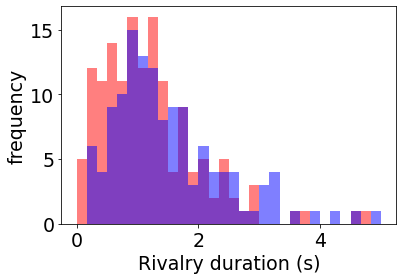

In [25]:

fig, ax = plt.subplots()
num_bins = 30
# the histogram of the data
n, bins, patches = ax.hist(leftDurations, num_bins, color='red', alpha=0.5, range=(0.001, 5))
n, bins, patches = ax.hist(rightDurations, num_bins, color='blue', alpha=0.5, range=(0.001, 5))

ax.set_ylabel('frequency')
ax.set_xlabel('Rivalry duration (s)')

In [ ]:
df = pd.DataFrame({'a': np.random.normal(0,5,1000), 'b': np.random.normal(20,5,1000)})

fig =plt.figure(figsize=(5,5))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

bins = np.arange(-20,40)

ax.hist(df['a'], bins=bins)
ax2.hist(df['b'],color='orange', bins=bins)
ax2.invert_yaxis()

AxesSubplot(0.125,0.536818;0.775x0.343182) teal False
AxesSubplot(0.125,0.125;0.775x0.343182) orange True


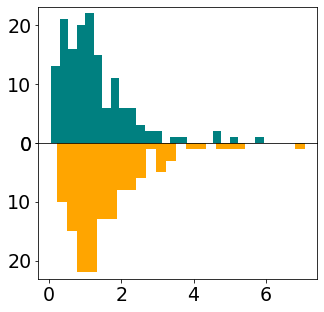

In [73]:
import seaborn as sn
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

#df = pd.DataFrame({'left': leftDurations, 'right':rightDurations})
ori_dict = {}
ori_dict['left'] = leftDurations
ori_dict['right'] = rightDurations

for ax, item, color, invert in zip(axes.ravel(), ori_dict, ['teal', 'orange'],  [False,True]):
    print(ax, color, invert)
    
    ax.hist(ori_dict[item], bins=num_bins, color=color)
    
    if invert:
        ax.invert_yaxis()
        
plt.subplots_adjust(hspace=0)

## By Eye

Text(0.5, 0, 'Rivalry duration (s)')

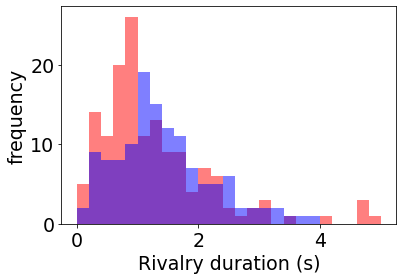

In [26]:

fig, ax = plt.subplots()
num_bins = 25
# the histogram of the data
n, bins, patches = ax.hist(leftEyeD, num_bins, color='red', alpha=0.5, range=(0.001, 5))
n, bins, patches = ax.hist(rightEyeD, num_bins, color='blue', alpha=0.5, range=(0.001, 5))

ax.set_ylabel('frequency')
ax.set_xlabel('Rivalry duration (s)')

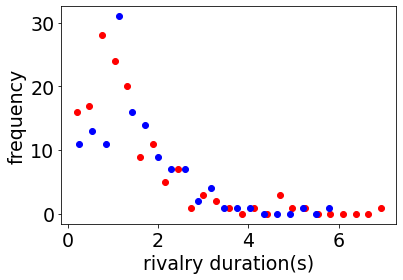

In [27]:
x = np.random.randn(10000)
countsL,bin_edgesL = np.histogram(leftEyeD,25)
bin_centersL = (bin_edgesL[:-1] + bin_edgesL[1:])/2.

countsR,bin_edgesR = np.histogram(rightEyeD,20)
bin_centersR = (bin_edgesR[:-1] + bin_edgesR[1:])/2.

fig, ax = plt.subplots()

plt.errorbar(bin_centersL, countsL, fmt='o', color='red')
plt.errorbar(bin_centersR, countsR, fmt='o', color='blue')

ax.set_ylabel('frequency')
ax.set_xlabel('rivalry duration(s)')

plt.show()

## By Orientation

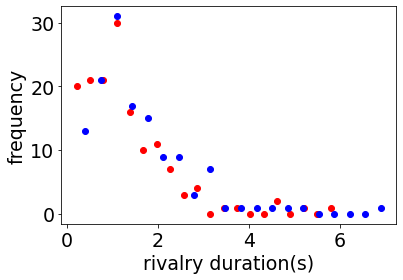

In [28]:
#x = np.random.randn(10000)
countsL,bin_edgesL = np.histogram(leftDurations,20)
bin_centersL = (bin_edgesL[:-1] + bin_edgesL[1:])/2.

countsR,bin_edgesR = np.histogram(rightDurations,20)
bin_centersR = (bin_edgesR[:-1] + bin_edgesR[1:])/2.

fig, ax = plt.subplots()

plt.errorbar(bin_centersL, countsL, fmt='o', color='red')
plt.errorbar(bin_centersR, countsR, fmt='o', color='blue')

ax.set_ylabel('frequency')
ax.set_xlabel('rivalry duration(s)')

plt.show()

In [29]:
# leftAlternations = np.reciprocal(leftDurations)
# rightAlternations = np.reciprocal(rightDurations)

# countsL,bin_edgesL = np.histogram(leftAlternations,20)
# bin_centersL = (bin_edgesL[:-1] + bin_edgesL[1:])/2.

# countsR,bin_edgesR = np.histogram(rightAlternations,20)
# bin_centersR = (bin_edgesR[:-1] + bin_edgesR[1:])/2.

# fig, ax = plt.subplots()

# #plt.errorbar(bin_centersL, countsL, fmt='o', color='red')
# plt.errorbar(bin_centersR, countsR, fmt='o', color='blue')

# ax.set_ylabel('frequency')
# ax.set_xlabel('rivalry alternations 1/duration(s)')

# plt.show()

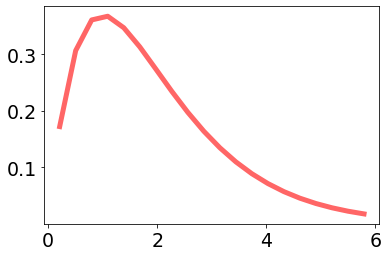

In [30]:
### PLOT GAMMA
from scipy.stats import gamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
#Calculate a few first moments:


a = 1.99323054838
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
#Display the probability density function (pdf):


x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
ax.plot(bin_centersL, gamma.pdf(bin_centersL, a), 'r-', lw=5, alpha=0.6, label='gamma pdf')

y = gamma.pdf(bin_centersL, a)

In [31]:
y

array([0.17203982, 0.3064781 , 0.36075699, 0.36728462, 0.34697259,
       0.3131198 , 0.27396763, 0.23442608, 0.19724165, 0.16378366,
       0.13456903, 0.10960849, 0.08863131, 0.07122831, 0.05694005,
       0.04530911, 0.03590892, 0.02835777, 0.02232362, 0.01752361])

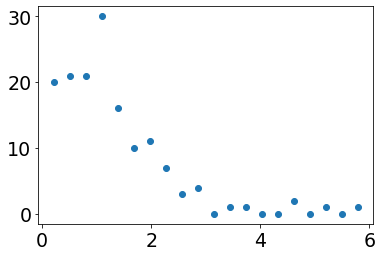

In [32]:



plt.plot(bin_centersL, countsL, 'o')

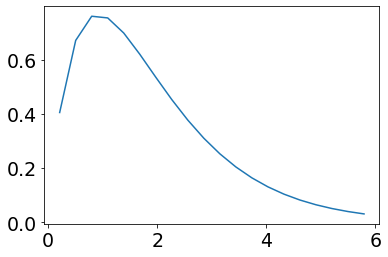

In [33]:
tryG = gamma.pdf(bin_centersL, 1.91)
plt.plot(bin_centersL, tryG*2)

In [34]:
scipy.special.gamma(bin_centersL)

array([ 4.37636402,  1.76188133,  1.16777077,  0.95517905,  0.88821996,
        0.90470288,  0.98851864,  1.14344124,  1.38753305,  1.75467952,
        2.30087702,  3.11613869,  4.34498866,  6.22121578,  9.12700918,
       13.69442548, 20.98119233, 32.7783826 , 52.15429818, 84.42546042])

In [35]:
def resample_with_replacement(x, y):
    """
    Resample data points with replacement from the dataset of `x` inputs and
    `y` measurements.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding measurement values to the inputs.

    Returns:ndarray, ndarray: The newly resampled `x` and `y` data points."""
  #######################################################
  ## TODO for students: resample dataset with replacement
  # Fill out function and remove
  #raise NotImplementedError("Student exercise: resample dataset with replacement")
  #######################################################

    # Get array of indices for resampled points
    sample_idx = np.random.choice(len(x), size=15, replace=True)

    # Sample from x and y according to sample_idx
    x_ = x[sample_idx]
    y_ = y[sample_idx]
    return x_, y_


In [36]:
def gammaTest(x, a, b):
    #b = 4.0
    gamma = scipy.special.gamma(x) 
    return (x**(a-1))*np.exp(-b*x)*((b**a)*(1/gamma))


In [77]:
from scipy.special import factorial
def gammaTest2(x, a, b):
    (b**a)*(x**(-1))*np.exp(-b*x)*scipy.special.factorial(a-1)

In [78]:
holdParamsA_R = np.zeros(400)
holdParamsB_R = np.zeros(400)

holdParamsA_L = np.zeros(400)
holdParamsB_L = np.zeros(400)

# RIGHT CI
for i in range(400):
    tryX, tryY = resample_with_replacement(bin_centersR, countsR)
    
    popt, pcov = scipy.optimize.curve_fit(gammaTest, tryX, tryY, p0 = [2.3, 4.0], maxfev=6000)
    holdParamsA_R[i] = popt[0]
    holdParamsB_R[i] = popt[1]

for i in range(400):
    tryX, tryY = resample_with_replacement(bin_centersL, countsL)
    
    popt, pcov = scipy.optimize.curve_fit(gammaTest, tryX, tryY, p0 = [5.3, 4.0], maxfev=6000)
    holdParamsA_L[i] = popt[0]
    holdParamsB_L[i] = popt[1]

C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [79]:
holdParamsA_R = np.zeros(400)
holdParamsB_R = np.zeros(400)

holdParamsA_L = np.zeros(400)
holdParamsB_L = np.zeros(400)

# RIGHT CI
for i in range(400):
    tryX, tryY = resample_with_replacement(bin_centersR, countsR)
    
    popt, pcov = scipy.optimize.curve_fit(gammaTest2, tryX, tryY, p0 = [2, 4.0], maxfev=6000)
    holdParamsA_R[i] = popt[0]
    holdParamsB_R[i] = popt[1]

for i in range(400):
    tryX, tryY = resample_with_replacement(bin_centersL, countsL)
    
    popt, pcov = scipy.optimize.curve_fit(gammaTest2, tryX, tryY, p0 = [2, 4.0], maxfev=6000)
    holdParamsA_L[i] = popt[0]
    holdParamsB_L[i] = popt[1]

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


[5.20109107 5.40447951]
[5.15570409 3.82246489]


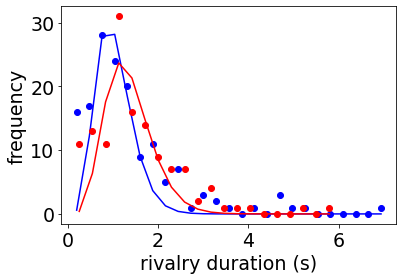

In [52]:
# iteratively look for smallest error with least mean square error to fit parameters for gamma 



# x data is bin_centersL
# y data is centersL

poptL, pcov = scipy.optimize.curve_fit(gammaTest, bin_centersL, countsL, p0 = [2.3, 4.0], maxfev=3000)
print(poptL)

poptR, pcovR = scipy.optimize.curve_fit(gammaTest, bin_centersR, countsR, p0 = [1.3, 4.0], maxfev=3000)
print(poptR)

fig, ax = plt.subplots()

plt.plot(bin_centersL, countsL, 'bo')
plt.plot(bin_centersL, gammaTest(bin_centersL, *poptL), 'b-', label='left grating')

plt.plot(bin_centersR, countsR, 'ro')
plt.plot(bin_centersR, gammaTest(bin_centersR, *poptR), 'r-', label='right grating')

ax.set_xlabel('rivalry duration (s)')
ax.set_ylabel('frequency')

lowerCI_L = gammaTest(bin_centersL, np.percentile(holdParamsA_L, 2.5), np.percentile(holdParamsB_L, 2.5))#, np.percentile(holdParamsB, 2.5))
upperCI_L = gammaTest(bin_centersL, np.percentile(holdParamsA_L, 97.5), np.percentile(holdParamsB_L, 97.5))#, np.percentile(holdParamsB, 97.5))

lowerCI_R = gammaTest(bin_centersR, np.percentile(holdParamsA_R, 2.5), np.percentile(holdParamsB_R, 2.5))#, np.percentile(holdParamsB, 2.5))
upperCI_R = gammaTest(bin_centersR, np.percentile(holdParamsA_R, 97.5), np.percentile(holdParamsB_R, 97.5))#, np.percentile(holdParamsB, 97.5))

#ax.fill_between(bin_centersL, lowerCI_L, upperCI_L, color='b', alpha=.1)
#ax.fill_between(bin_centersR, lowerCI_R, upperCI_R, color='r', alpha=.1)

In [53]:
# BY EYE 

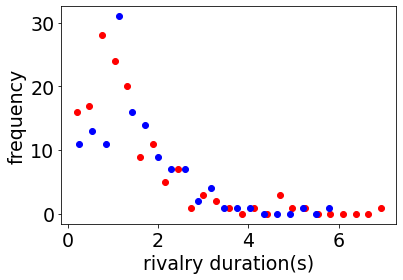

In [54]:
x = np.random.randn(10000)
countsL,bin_edgesL = np.histogram(leftEyeD,25)
bin_centersL = (bin_edgesL[:-1] + bin_edgesL[1:])/2.

countsR,bin_edgesR = np.histogram(rightEyeD,20)
bin_centersR = (bin_edgesR[:-1] + bin_edgesR[1:])/2.

fig, ax = plt.subplots()

plt.errorbar(bin_centersL, countsL, fmt='o', color='red')
plt.errorbar(bin_centersR, countsR, fmt='o', color='blue')

ax.set_ylabel('frequency')
ax.set_xlabel('rivalry duration(s)')

plt.show()

In [56]:
holdParamsA_R = np.zeros(400)
holdParamsB_R = np.zeros(400)

holdParamsA_L = np.zeros(400)
holdParamsB_L = np.zeros(400)

# RIGHT CI
for i in range(400):
    tryX, tryY = resample_with_replacement(bin_centersR, countsR)
    
    popt, pcov = scipy.optimize.curve_fit(gammaTest, tryX, tryY, p0 = [2.3, 4.0], maxfev=6000)
    holdParamsA_R[i] = popt[0]
    holdParamsB_R[i] = popt[1]

for i in range(400):
    tryX, tryY = resample_with_replacement(bin_centersL, countsL)
    
    popt, pcov = scipy.optimize.curve_fit(gammaTest, tryX, tryY, p0 = [2.3, 4.0], maxfev=6000)
    holdParamsA_L[i] = popt[0]
   # holdParamsB_R[i] = popt[1]

C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.


[5.20109107 5.40447951]
[5.15570409 3.82246489]


C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\elawl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Text(0, 0.5, 'frequency')

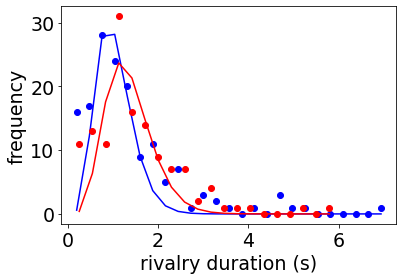

In [59]:
# iteratively look for smallest error with least mean square error to fit parameters for gamma 



# x data is bin_centersL
# y data is centersL

poptL, pcov = scipy.optimize.curve_fit(gammaTest, bin_centersL, countsL, p0 = [2.3, 4.0], maxfev=3000)
print(poptL)

poptR, pcovR = scipy.optimize.curve_fit(gammaTest, bin_centersR, countsR, p0 = [1.3, 4.0], maxfev=3000)
print(poptR)

fig, ax = plt.subplots()

plt.plot(bin_centersL, countsL, 'bo')
plt.plot(bin_centersL, gammaTest(bin_centersL, poptL[0], poptL[1]), 'b-', label='left grating')

plt.plot(bin_centersR, countsR, 'ro')
plt.plot(bin_centersR, gammaTest(bin_centersR, *poptR), 'r-', label='right grating')

ax.set_xlabel('rivalry duration (s)')
ax.set_ylabel('frequency')

# lowerCI_L = gammaTest(bin_centersL, np.percentile(holdParamsA_L, 2.5))#, np.percentile(holdParamsB, 2.5))
# upperCI_L = gammaTest(bin_centersL, np.percentile(holdParamsA_L, 97.5))#, np.percentile(holdParamsB, 97.5))

# lowerCI_R = gammaTest(bin_centersR, np.percentile(holdParamsA_R, 2.5))#, np.percentile(holdParamsB, 2.5))
# upperCI_R = gammaTest(bin_centersR, np.percentile(holdParamsA_R, 97.5))#, np.percentile(holdParamsB, 97.5))

# ax.fill_between(bin_centersL, lowerCI_L, upperCI_L, color='b', alpha=.1)
# ax.fill_between(bin_centersR, lowerCI_R, upperCI_R, color='r', alpha=.1)

In [60]:
np.percentile(holdParamsB, 97.5)

NameError: name 'holdParamsB' is not defined

NameError: name 'holdParamsB' is not defined

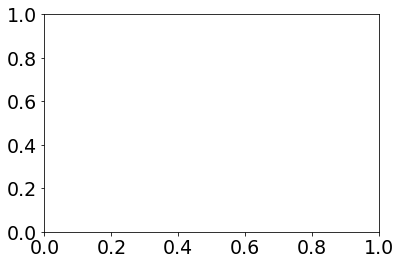

In [61]:
fig,ax = plt.subplots()
plt.hist(holdParamsB, bins=30)
ax.axvline(poptL[0], color='r')
ax.axvline(np.percentile(holdParamsB_R, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(holdParamsB_R, 97.5), color='b')

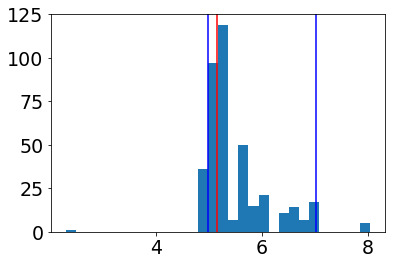

In [118]:
fig,ax = plt.subplots()
plt.hist(holdParamsA, bins=30)
ax.axvline(poptL[0], color='r')
ax.axvline(np.percentile(holdParamsA, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(holdParamsA, 97.5), color='b')

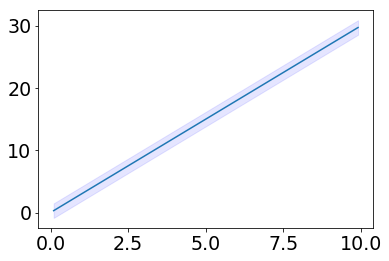

In [119]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [120]:
ci

1.1658813806233508

In [121]:
ke = responseDf.keyboardEvent[trial] # keyboard event
        kt = responseDf.times[trial] # time of keypress
        
        try: # numEvents is the number of key events stored in ke; if it's a single value then might not have length
            numEvents = len(ke)
        except:
            numEvents = 1

        keyDur = np.zeros((numEvents))
        noResponseDur = []
        keyDurA = np.zeros((numEvents, len(downEvents)))
        #print(numEvents)
        #print(ke)
        
        try:
            firstKeyEvent = ke[0]
            firstKeyTime = kt[0]
        except:
            print('no key response!?', trial, ke, kt)
            firstKeyEvent = np.nan
            firstKeyTime = np.nan
        
        for eventIn in range(numEvents):
            # print(eventIn)
            if ke == 99: # end of the trial
                event = 99
            else:
                event = ke[eventIn]
                time1 = kt[eventIn]
                
        
        
                if event in downEvents:

                    if event == 1: # RED down
                        upKey = 2
                    elif event == 3: # BLUE down
                        upKey = 4
                    else:
                        upKey = 6
                        print('Down key not found...')
                        
#                     if 'time2' in locals() and time2 < time1:
#                         noResponseDuration = time1 - time2
#                         noResponseDur.append(noResponseDuration)
#                         print('time2: ', time2, 'time1: ', time1, 'time1 by KT:', kt[eventIn], 'event index:', eventIn, 'tempKT: ', tempKt)

                    foundUpKey = 0 # False
                    tempKt = np.array(kt)
                    tempTimes = tempKt[np.where(tempKt>time1)]
                    tempEvents = np.array(ke)
                    tempEvents = tempEvents[np.where(tempKt>time1)]
                    tempNumEvents = len(tempTimes)
                    for j in range(tempNumEvents):#range(numEvents):

                        if tempEvents[j] == upKey:
                            time2 = tempTimes[j]
                            foundUpKey = 1
                            break
                            
                            
                            # time 2 will be the start of the blank duration
                            blankStart = time2
                            if blankStart < 5.0:
                                blankEnd = tempTimes[j+1]
                                if blankEnd < 5.0:
                                    noResponseDuration = blankEnd - blankStart
                                    noResponseDur.append(noResponseDuration)
                                    print(tempTimes[j+1])


                            
                    if foundUpKey == 0:

                        if ke[-1] == 99: # and usingFullTrialDuration
                            time2 = kt[-1] # end of the key times
                        else:
                            time2 = endTrialTime
                            print('Using default trial length')

                    keyDur[eventIn] = time2 - time1
                    keyDurA[eventIn, int((upKey/2)-1)] = time2 - time1
                    
                # end if
            # end for key event loop
        # end if responseDf.trialType[trial] == 0:


            checkNegativeTime = np.array([kDur < 0 for kDur in keyDur])
            if checkNegativeTime.any():
                print(keyDur)
                print('D: Negative key durations for trial %d' %(trial+1))


IndentationError: unexpected indent (<ipython-input-121-ed35116c5d5d>, line 2)